### Project Overview
#### In this project, I used Logistic Regression and the train-test split method to build a model that can predict whether a person will subscribe to a bank service or not. The prediction is based on different features like age, housing status, loan status, and more.
#### The model gives a "yes" or "no" answer for subscription, and it achieved an accuracy of 83%.

 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
df=pd.read_csv('bank-full.csv')

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#### Mapping yes and no  to 1 and 0 

In [6]:
for col in ['loan', 'default', 'housing']:
    cleaned = df[col].astype(str).str.strip().str.lower()
    print(f"Unique cleaned values in '{col}':", cleaned.unique())

Unique cleaned values in 'loan': ['no' 'yes']
Unique cleaned values in 'default': ['no' 'yes']
Unique cleaned values in 'housing': ['yes' 'no']


In [7]:
for col in ['loan', 'default', 'housing']:
    df[col] = df[col].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,no


#### Renaming the target column for better understanding

In [8]:
df = df.rename(columns={'y': 'subscription'})

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscription    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  int64 
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  int64 
 7   loan          45211 non-null  int64 
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  subscription  45211 non-null  object
dtypes: int64(10), object(7)
memory usage: 5.9+ MB


In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscription'],
      dtype='object')

#### Removing rows with unknown entries 

In [13]:
df = df[~df.isin(['unknown']).any(axis=1)]
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
24060,33,admin.,married,tertiary,0,882,0,0,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,0,-247,1,1,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,0,3444,1,0,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,0,2415,1,0,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,0,0,1,0,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,0,1475,1,0,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,married,tertiary,0,583,0,0,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,0,2850,0,0,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,yes


In [14]:
yes=df[df.subscription=='yes']
yes.shape

(1786, 17)

In [15]:
no=df[df.subscription=='no']
no.shape

(6056, 17)

In [16]:
df.groupby('subscription').mean(numeric_only=True)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
subscription,,,,,,,,,,
no,40.373018,0.008587,1419.795740,0.713672,0.160997,14.133587,216.867239,2.145476,232.445674,3.153236
yes,42.176932,0.002240,2001.787794,0.347144,0.063830,14.688690,411.922172,1.788914,192.081747,3.289474


## To check how different columns have effect on subscription or the can be a useful parameter for subscription or not


#### Age
##### Age has an effect as younger people have 50 50 chance to buy a subscription ranging from 0-30
##### whereas people of middle age are less likely to buy there can be various reasons, and people aged 60+ are most likely to buy a subscription.

In [17]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


<Axes: xlabel='age_group'>

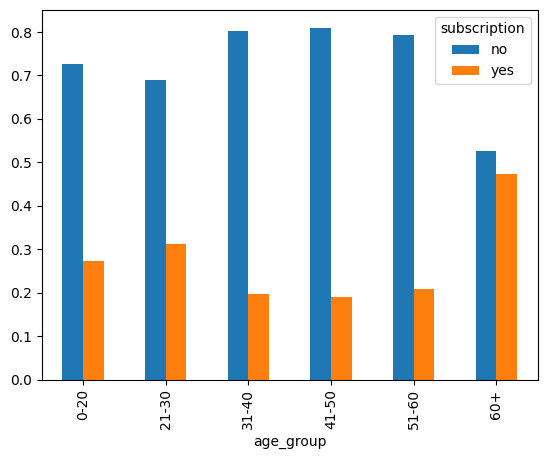

In [18]:
pd.crosstab(df.age_group,df.subscription,normalize='index').plot(kind='bar')

#### Duration
##### Duration info shows that it affects subscription 
##### Duration means how long people are on call, and if people are on long calls, it means they are interested whereas people with a short duration means not interested 

In [48]:
df.groupby('subscription')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
subscription,,,,,,,,
no,6056.0,216.867239,196.138924,5.0,98.0,163.0,271.25,2219.0
yes,1786.0,411.922172,291.860627,63.0,215.0,315.5,522.00,2184.0


#### Balance
##### Balance also affects it, so subscription depends on it, as people with a high balance will buy, and low balance will not buy a subscription  


In [96]:
df.groupby('subscription')['balance'].describe()

,count,mean,std,min,25%,50%,75%,max
subscription,,,,,,,,
no,6056.0,1419.795740,2661.157917,-1884.0,135.75,533.5,1550.00,37378.0
yes,1786.0,2001.787794,4184.606197,-556.0,262.00,886.0,2366.75,81204.0


#### Loan
##### People without a personal loan are more likely to subscribe — about 1 in 4 subscribed (24.76%).
##### People with a loan are much less likely to subscribe, only about 1 in 10 (10.47%).
##### Having a loan appears to negatively impact the likelihood of subscription.


In [50]:
pd.crosstab(df['loan'], df['subscription'], normalize='index') * 100

subscription,no,yes
loan,,
0,75.240634,24.759366
1,89.531680,10.468320


#### Default
##### Clients without a default are more likely to subscribe (22.89%).
##### Clients with a credit default rarely subscribe (only 7.14%).

In [51]:
pd.crosstab(df['default'], df['subscription'], normalize='index') * 100

subscription,no,yes
default,,
0,77.112767,22.887233
1,92.857143,7.142857


#### Housing
##### Housing means they have taken a house loan, which means that those people will not buy a subscription who have taken the loan. 

In [19]:
pd.crosstab(df['housing'], df['subscription'], normalize='columns') * 100

subscription,no,yes
housing,,
0,28.632761,65.285554
1,71.367239,34.714446


In [20]:
subdf=df[['duration','campaign','pdays','previous','poutcome','loan','age','default','housing','balance']]
subdf

,duration,campaign,pdays,previous,poutcome,loan,age,default,housing,balance
24060,39,1,151,3,failure,0,33,0,0,882
24062,519,1,166,1,other,1,42,0,1,-247
24064,144,1,91,4,failure,0,33,0,1,3444
24072,73,1,86,4,other,0,36,0,1,2415
24077,140,1,143,3,failure,0,36,0,1,0
...,...,...,...,...,...,...,...,...,...,...
45199,1166,3,530,12,other,0,34,0,1,1475
45201,226,1,184,4,success,0,53,0,0,583
45204,300,1,40,8,failure,0,73,0,0,2850
45208,1127,5,184,3,success,0,72,0,0,5715


In [21]:
subdf_dummy=pd.get_dummies(subdf['poutcome']).astype(int)

In [22]:
new_df=pd.concat([subdf,subdf_dummy],axis='columns')
new_df.drop('poutcome',axis='columns',inplace=True)
new_df

,duration,campaign,pdays,previous,loan,age,default,housing,balance,failure,other,success
24060,39,1,151,3,0,33,0,0,882,1,0,0
24062,519,1,166,1,1,42,0,1,-247,0,1,0
24064,144,1,91,4,0,33,0,1,3444,1,0,0
24072,73,1,86,4,0,36,0,1,2415,0,1,0
24077,140,1,143,3,0,36,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45199,1166,3,530,12,0,34,0,1,1475,0,1,0
45201,226,1,184,4,0,53,0,0,583,0,0,1
45204,300,1,40,8,0,73,0,0,2850,1,0,0
45208,1127,5,184,3,0,72,0,0,5715,0,0,1


In [23]:
#### Assigning Variables

In [24]:
x=new_df

In [25]:
y=df['subscription']

In [26]:
type(y)

pandas.core.series.Series

In [27]:
model=LogisticRegression()

In [28]:
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.3)

In [29]:
model.fit(x_train,y_train)

C:\Users\Rabia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Model Prediction 

In [30]:
model.predict(x_test)

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'],
      shape=(2353,), dtype=object)

#### Model Accuracy

In [31]:
model.score(x_train,y_train)

0.8345782474038987

#### Saving Model

In [32]:
import joblib

In [33]:
joblib.dump(model,"sub_joblib")

['sub_joblib']

In [34]:
use=joblib.load('sub_joblib')

In [35]:
columns = ['duration', 'campaign', 'pdays', 'previous', 'loan', 'age','default', 'housing', 'balance', 'failure', 'other', 'success']
sample_input = pd.DataFrame([[300, 2, 999, 0, 0, 35, 0, 1, 1200, 0, 1, 0]], columns=columns)
use.predict(sample_input)

array(['no'], dtype=object)